<a href="https://colab.research.google.com/github/Zorcaris/MIT6.S191/blob/main/Neural_networks_in_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### Defining a dense layer ###

# num_inputs: number of input nodes
# num_outputs: number of output nodes
# x: input to the layer

class OurDenseLayer(torch.nn.Module): #nn.Module -> define layers
  def __init__(self, num_inputs, num_outputs):
    super(OurDenseLayer, self).__init__()
    self.W = torch.nn.Parameter(torch.randn(num_inputs, num_outputs))
    self.bias = torch.nn.Parameter(torch.randn(num_outputs))
  def forward(self, x):
    z = torch.matmul(x, self.W) + self.bias
    y = torch.sigmoid(z)
    return y
num_inputs = 2
num_outputs = 3
layer = OurDenseLayer(num_inputs, num_outputs)
x_input = torch.tensor([[1, 2.]])
y = layer(x_input) # calls foward

print(f"input shape: {x_input.shape}")
print(f"output shape: {y.shape}")
print(f"output result: {y}")

input shape: torch.Size([1, 2])
output shape: torch.Size([1, 3])
output result: tensor([[0.0757, 0.8899, 0.7776]], grad_fn=<SigmoidBackward0>)


In [ ]:
### Defining a neural network using the PyTorch Sequential API ###

# define the number of inputs and outputs
n_input_nodes = 2
n_output_nodes = 3

# Define the model
model = nn.Sequential(
    nn.Linear(n_input_nodes, n_output_nodes),
    nn.Sigmoid()
)

# Test the model with example input
x_input = torch.tensor([[1, 2.]])
model_output = model(x_input) #performs matrix multiplication

print(f"input shape: {x_input.shape}")
print(f"output shape: {y.shape}")
print(f"output result: {y}")

input shape: torch.Size([1, 2])
output shape: torch.Size([1, 3])
output result: tensor([[0.0757, 0.8899, 0.7776]], grad_fn=<SigmoidBackward0>)


In [ ]:
### Defining a model using subclassing ###

class LinearWithSigmoidActivation(nn.Module):
  def __init__(self, num_inputs, num_outputs):
    super(LinearWithSigmoidActivation, self).__init__()
    self.linear = nn.Linear(num_inputs, num_outputs)
    self.activation = nn.Sigmoid()

  def forward(self, inputs):
    linear_output = self.linear(inputs)
    output = self.activation(linear_output)
    return output
n_input_nodes = 2
n_output_nodes = 3
model = LinearWithSigmoidActivation(n_input_nodes, n_output_nodes)
x_input = torch.tensor([[1, 2.]])
y = model(x_input)
print(f"input shape: {x_input.shape}")
print(f"output shape: {y.shape}")
print(f"output result: {y}")

input shape: torch.Size([1, 2])
output shape: torch.Size([1, 3])
output result: tensor([[0.1959, 0.3399, 0.4961]], grad_fn=<SigmoidBackward0>)


In [ ]:
### Custom behavior with subclassing nn.Module ###

class LinearButSometimesIdentity(nn.Module):
  def __init__(self, num_inputs, num_outputs):
    super(LinearButSometimesIdentity, self).__init__()
    self.linear = nn.Linear(num_inputs, num_outputs)

  def forward(self, inputs, isidentity=False):
    if isidentity:
      return inputs
    else:
      return self.linear(inputs)

# Test the IdentityModel
model = LinearButSometimesIdentity(num_inputs=2, num_outputs=3)
x_input = torch.tensor([[1, 2.]])
out_with_linear = model(x_input)
out_with_identity = model(x_input, isidentity=True)

print(f"input: {x_input}")
print("Network linear output: {}; network identity output: {}".format(out_with_linear, out_with_identity))

input: tensor([[1., 2.]])
Network linear output: tensor([[ 1.3545, -0.0738, -1.3296]], grad_fn=<AddmmBackward0>); network identity output: tensor([[1., 2.]])


In [ ]:
### Gradient computation ###

# Example: x = 3.0
# y = x^2

x = torch.tensor(3.0, requires_grad=True)
y = x ** 2
y.backward()  # Compute the gradient

dy_dx = x.grad
print("dy_dx of y=x^2 at x=3.0 is: ", dy_dx)
assert dy_dx == 6.0

dy_dx of y=x^2 at x=3.0 is:  tensor(6.)


Initializing x=0.911391019821167


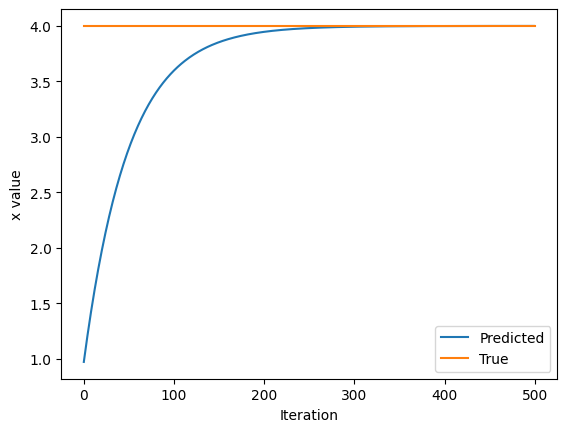

In [ ]:
### Function minimization with autograd and gradient descent ###

# Initialize a random value for our intial x
x = torch.randn(1)
print(f"Initializing x={x.item()}")

learning_rate = 1e-2  # Learning rate
history = []
x_f = 4  # Target value

# We will run gradient descent for a number of iterations. At each iteration, we compute the loss,
#   compute the derivative of the loss with respect to x, and perform the update.
for i in range(500):
    x = torch.tensor([x], requires_grad=True)
    loss = (x - x_f) ** 2
     # Backpropagate through the loss to compute gradients
    loss.backward()
     # Update x with gradient descent
    x = x.item() - learning_rate * x.grad

    history.append(x.item())

# Plot the evolution of x as we optimize toward x_f!
plt.plot(history)
plt.plot([0, 500], [x_f, x_f])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.show()
